## HOUSE PRICE PREDICTION

In this section, we focus on preparing the dataset for training a linear regression model to predict house prices based on their square footage, the number of bedrooms, and the number of bathrooms. Given the detailed dataset description, we will cut down the dataset to include only the necessary columns relevant to our problem statement.

### Problem Statement
We aim to implement a linear regression model to predict the prices of houses based on the following features:
- **GrLivArea**: Above grade (ground) living area square feet.
- **BedroomAbvGr**: Bedrooms above grade (does NOT include basement bedrooms).
- **FullBath**: Full bathrooms above grade.

Additionally, the target variable for our training dataset is:
- **SalePrice**: The sale price of the house.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


### Reading and Understanding the Data

In [3]:
# Loading the dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
print(train_df.shape)
print(test_df.shape)

(1460, 81)
(1459, 80)


In [7]:
# Columns required based on the problem statement
required_columns = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']

In [8]:
# Ensure all required columns are present in the training dataset
assert all(column in train_df.columns for column in required_columns), "Some required columns are missing in the training dataset"

# For the test dataset, we check for the same columns except 'SalePrice' because we typically do not have the target variable in the test dataset
assert all(column in test_df.columns for column in required_columns[:-1]), "Some required columns are missing in the test dataset"

In [9]:
# Select the required columns in the training dataset
Train_df = train_df[required_columns]

# Select the required feature columns in the test dataset (excluding 'SalePrice')
Test_df = test_df[required_columns[:-1]]

In [10]:
Train_df.head()

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000


In [11]:
Test_df.head()

,GrLivArea,BedroomAbvGr,FullBath
0,896,2,1
1,1329,3,1
2,1629,3,2
3,1604,3,2
4,1280,2,2


In [12]:
print(Train_df.info())
print(Test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   SalePrice     1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1459 non-null   int64
 1   BedroomAbvGr  1459 non-null   int64
 2   FullBath      1459 non-null   int64
dtypes: int64(3)
memory usage: 34.3 KB
None


### Cleaning the Data 

In [13]:
# Check for missing values
print("TRAIN DATASET")
print(Train_df.isnull().sum())

print("TEST DATASET")
print(Test_df.isnull().sum())

TRAIN DATASET
GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64
TEST DATASET
GrLivArea       0
BedroomAbvGr    0
FullBath        0
dtype: int64


In [14]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   GrLivArea     1460 non-null   int64
 1   BedroomAbvGr  1460 non-null   int64
 2   FullBath      1460 non-null   int64
 3   SalePrice     1460 non-null   int64
dtypes: int64(4)
memory usage: 45.8 KB


In [15]:
Train_df.describe()

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000
mean,1515.463699,2.866438,1.565068,180921.195890
std,525.480383,0.815778,0.550916,79442.502883
min,334.000000,0.000000,0.000000,34900.000000
25%,1129.500000,2.000000,1.000000,129975.000000
50%,1464.000000,3.000000,2.000000,163000.000000
75%,1776.750000,3.000000,2.000000,214000.000000
max,5642.000000,8.000000,3.000000,755000.000000


### Visualizing the Data

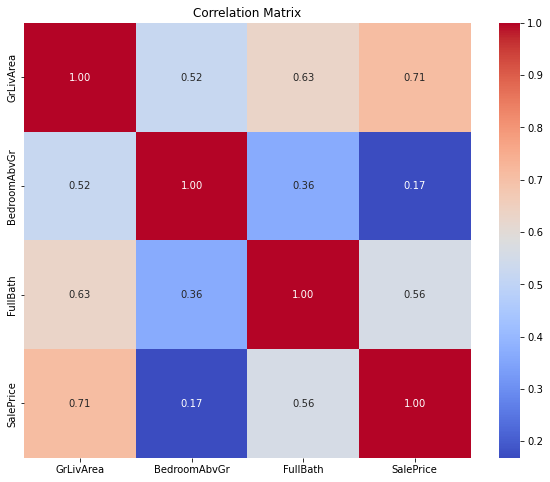

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = Train_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

According to the Heatmap we can conclude that `GrLivArea` is most correlated with `SalePrice`

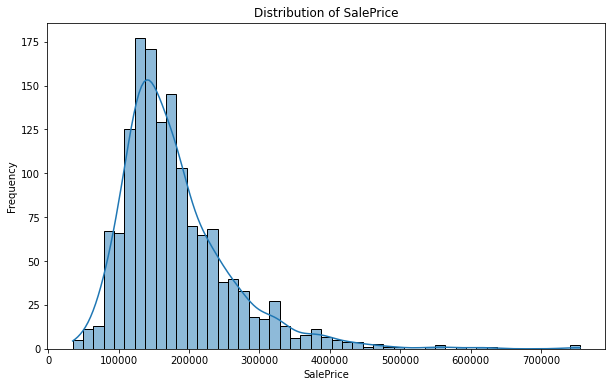

In [17]:
# Distribution of SalePrice
plt.figure(figsize=(10, 6))
sns.histplot(Train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


The histogram shows that the SalePrice of houses is right-skewed, with most prices between 100,000 and 300,000. The tallest bars indicate a peak around 150,000. The KDE curve highlights the overall distribution shape, confirming a positive skew with a long tail extending towards higher prices.

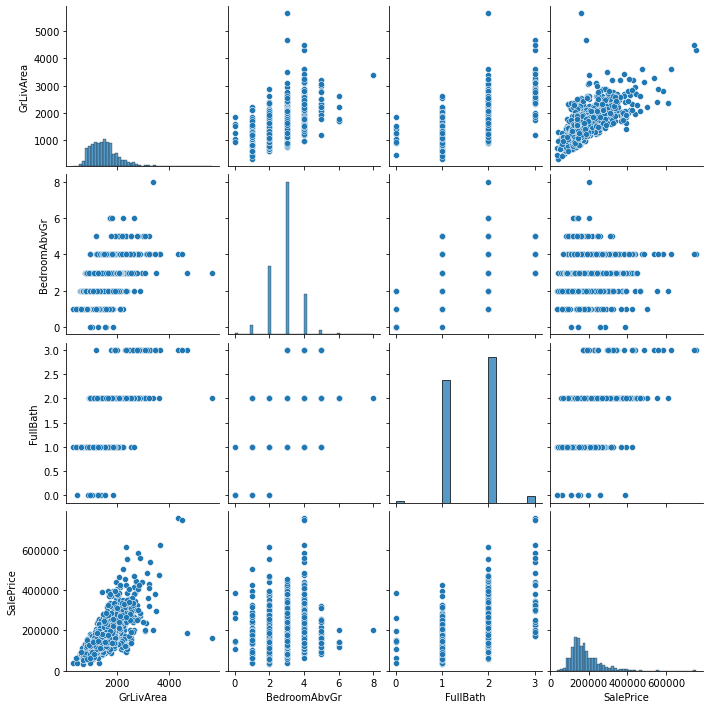

In [18]:
# Pair plots for numerical features
sns.pairplot(Train_df[required_columns])
plt.show()

The pair plot displays relationships between GrLivArea, BedroomAbvGr, FullBath, and SalePrice. Key observations include:

- GrLivArea and SalePrice show a positive correlation, indicating larger living areas tend to have higher sale prices.
- BedroomAbvGr and FullBath show no clear correlation with SalePrice.
- The distribution of each feature is shown along the diagonal, with GrLivArea and SalePrice both being right-skewed.


In [19]:
Train_df.head()

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000


In [20]:
Train_df['BedroomAbvGr'].value_counts()

3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

Since houses with number of bedrooms  **0** , **1** , **5** , **6** , **8** have negligible values so we will consider dropping these values.

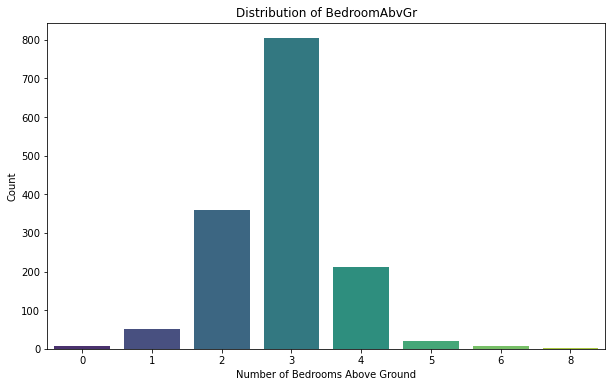

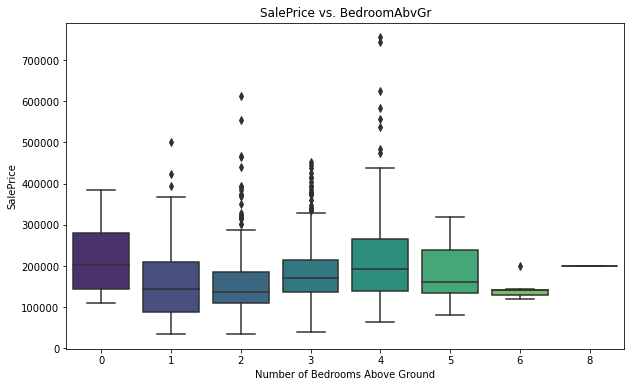

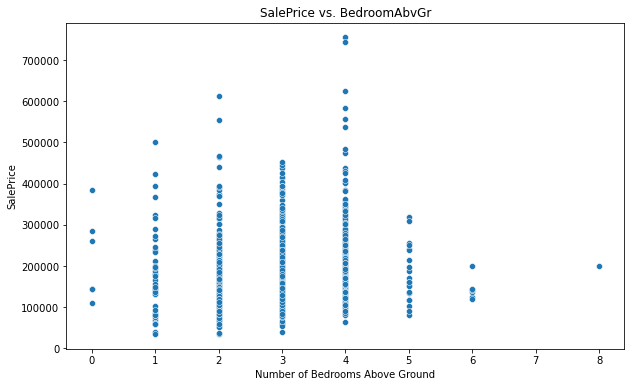

In [21]:
# Assuming train_df is your DataFrame
# Plot the distribution of BedroomAbvGr
plt.figure(figsize=(10, 6))
sns.countplot(x='BedroomAbvGr', data=train_df, palette='viridis')
plt.title('Distribution of BedroomAbvGr')
plt.xlabel('Number of Bedrooms Above Ground')
plt.ylabel('Count')
plt.show()

# Box plot to visualize the relationship between BedroomAbvGr and SalePrice
plt.figure(figsize=(10, 6))
sns.boxplot(x='BedroomAbvGr', y='SalePrice', data=train_df, palette='viridis')
plt.title('SalePrice vs. BedroomAbvGr')
plt.xlabel('Number of Bedrooms Above Ground')
plt.ylabel('SalePrice')
plt.show()

# Scatter plot to visualize the relationship between BedroomAbvGr and SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(x='BedroomAbvGr', y='SalePrice', data=train_df, palette='viridis')
plt.title('SalePrice vs. BedroomAbvGr')
plt.xlabel('Number of Bedrooms Above Ground')
plt.ylabel('SalePrice')
plt.show()


In [22]:
# List of values to drop
values_to_drop = [0, 1, 5, 6, 8]

# Drop rows where BedroomAbvGr is in the list of values to drop
Train_df = Train_df[~Train_df['BedroomAbvGr'].isin(values_to_drop)]

# Verify the changes by checking the value counts again
print(Train_df['BedroomAbvGr'].value_counts())

3    804
2    358
4    213
Name: BedroomAbvGr, dtype: int64


Checking for Test Dataset also

In [23]:
Test_df['BedroomAbvGr'].value_counts()

3    792
2    384
4    187
1     53
5     27
6     14
0      2
Name: BedroomAbvGr, dtype: int64

In [24]:
Test_df = Test_df[~Test_df['BedroomAbvGr'].isin(values_to_drop)]
print(Test_df['BedroomAbvGr'].value_counts())

3    792
2    384
4    187
Name: BedroomAbvGr, dtype: int64


Creating Dummy Variable for the `BedroomAbvGr`

In [25]:
bedroom_dummies = pd.get_dummies(Train_df['BedroomAbvGr'], prefix='Bedroom')

# Dropping the original BedroomAbvGr column
Train_df = Train_df.drop('BedroomAbvGr', axis=1)

# Concatenate the dummy variables with the original DataFrame
Train_df = pd.concat([Train_df, bedroom_dummies], axis=1)

Train_df.head()

,GrLivArea,FullBath,SalePrice,Bedroom_2,Bedroom_3,Bedroom_4
0,1710,2,208500,0,1,0
1,1262,2,181500,0,1,0
2,1786,2,223500,0,1,0
3,1717,1,140000,0,1,0
4,2198,2,250000,0,0,1


In [26]:
bedroom_dummies_test = pd.get_dummies(Test_df['BedroomAbvGr'], prefix='Bedroom')

# Dropping the original BedroomAbvGr column in the test dataset
Test_df = Test_df.drop('BedroomAbvGr', axis=1)

# Ensure the dummy variable columns in the test dataset match those in the training dataset
# Add any missing dummy variable columns to the test dataset with value 0
for col in bedroom_dummies.columns:
    if col not in bedroom_dummies_test.columns:
        bedroom_dummies_test[col] = 0

# Concatenate the dummy variables with the test DataFrame
Test_df = pd.concat([Test_df, bedroom_dummies_test], axis=1)

# Ensure the columns order match between train and test datasets
Test_df = Test_df[Train_df.columns.drop('SalePrice')]

Test_df.head()

,GrLivArea,FullBath,Bedroom_2,Bedroom_3,Bedroom_4
0,896,1,1,0,0
1,1329,1,0,1,0
2,1629,2,0,1,0
3,1604,2,0,1,0
4,1280,2,1,0,0


In [27]:
Train_df['FullBath'].value_counts()

2    742
1    602
3     29
0      2
Name: FullBath, dtype: int64

In [28]:
Test_df['FullBath'].value_counts()

2    728
1    611
3     22
4      1
0      1
Name: FullBath, dtype: int64

Similarly with `FullBath` **0** & **4** (in test dataset) have almost negligible values so we may consider dropping them

In [29]:
# Checking and droping negligible values in both train and test datasets for FullBath
Train_df = Train_df[Train_df['FullBath'].isin([1, 2, 3])]  # Keep only values 1, 2, and 3
Test_df = Test_df[Test_df['FullBath'].isin([1, 2, 3])]  # Keep only values 1, 2, and 3


In [30]:
fullbath_dummies = pd.get_dummies(Train_df['FullBath'], prefix='FullBath')
Train_df = Train_df.drop('FullBath', axis=1)

# Concatenate the dummy variables with the training DataFrame
Train_df = pd.concat([Train_df, fullbath_dummies], axis=1)
Train_df.head()

,GrLivArea,SalePrice,Bedroom_2,Bedroom_3,Bedroom_4,FullBath_1,FullBath_2,FullBath_3
0,1710,208500,0,1,0,0,1,0
1,1262,181500,0,1,0,0,1,0
2,1786,223500,0,1,0,0,1,0
3,1717,140000,0,1,0,1,0,0
4,2198,250000,0,0,1,0,1,0


In [31]:
fullbath_dummies_test = pd.get_dummies(Test_df['FullBath'], prefix='FullBath')
Test_df = Test_df.drop('FullBath', axis=1)

# Ensure the dummy variable columns in the test dataset match those in the training dataset
# Add any missing dummy variable columns to the test dataset with value 0
for col in fullbath_dummies.columns:
    if col not in fullbath_dummies_test.columns:
        fullbath_dummies_test[col] = 0

# Concatenate the dummy variables with the test DataFrame
Test_df = pd.concat([Test_df, fullbath_dummies_test], axis=1)
Test_df.head()

,GrLivArea,Bedroom_2,Bedroom_3,Bedroom_4,FullBath_1,FullBath_2,FullBath_3
0,896,1,0,0,1,0,0
1,1329,0,1,0,1,0,0
2,1629,0,1,0,0,1,0
3,1604,0,1,0,0,1,0
4,1280,1,0,0,0,1,0


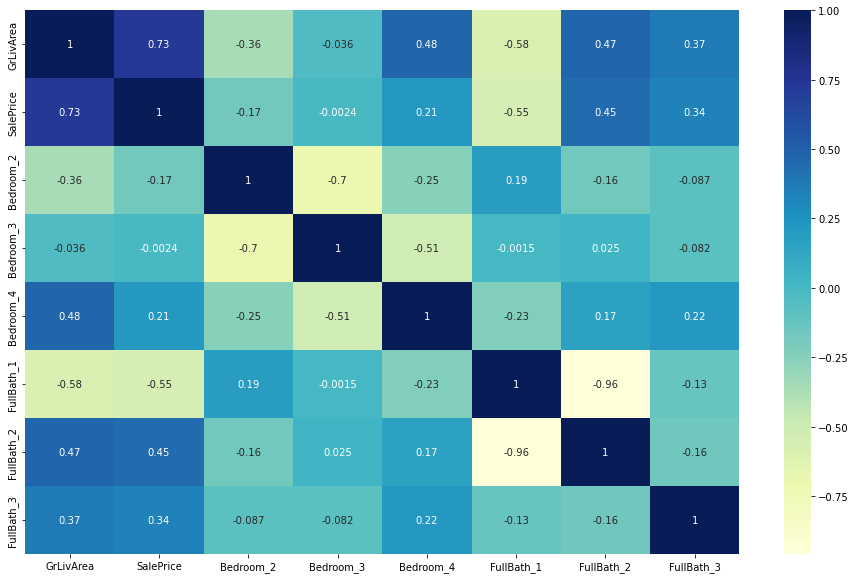

In [32]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(Train_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the heatmap we can conlcude that `SalePrice` has most correlation with `GrLivArea`. Let's see a pairplot for `GrLivArea` vs `SalePrice`.

In [33]:
# Define the threshold for outliers (e.g., using mean and standard deviation)
mean = Train_df['GrLivArea'].mean()
std_dev = Train_df['GrLivArea'].std()
upper_bound = mean + 3 * std_dev 

# Filter the dataset to remove outliers in GrLivArea
Train_df = Train_df[Train_df['GrLivArea'] <= upper_bound]

# Check the new distribution and summary statistics
print(Train_df['GrLivArea'].describe())

# Repeat the same for the test dataset 
Test_df = Test_df[Test_df['GrLivArea'] <= upper_bound]

count    1358.000000
mean     1490.275405
std       452.433089
min       605.000000
25%      1134.000000
50%      1456.000000
75%      1751.500000
max      2945.000000
Name: GrLivArea, dtype: float64


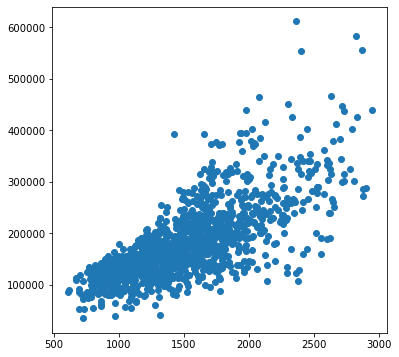

In [34]:
plt.figure(figsize=[6,6])
plt.scatter(Train_df.GrLivArea, Train_df.SalePrice)
plt.show()

#### Splitting the Data into Training and Testing Sets

In [36]:
# Feature scaling with MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform GrLivArea in Train_df
Train_df['GrLivArea'] = scaler.fit_transform(Train_df[['GrLivArea']])
# Transform GrLivArea in Test_df using the scaler fitted on Train_df
Test_df['GrLivArea'] = scaler.transform(Test_df[['GrLivArea']])

In [37]:
np.random.seed(0)
df_train, df_test = train_test_split(Train_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [38]:
df_train.head()

,GrLivArea,SalePrice,Bedroom_2,Bedroom_3,Bedroom_4,FullBath_1,FullBath_2,FullBath_3
30,0.304274,40000,0,1,0,1,0,0
349,0.907265,437154,0,0,1,0,1,0
873,0.283333,133000,0,1,0,1,0,0
950,0.110684,129000,0,1,0,1,0,0
1277,0.478205,197900,0,1,0,1,0,0


### Creating a Model

In [39]:
y_train = df_train.pop('SalePrice')
X_train = df_train

In [40]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['GrLivArea']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [41]:
# Check the parameters obtained

lr.params

const         75790.744208
GrLivArea    268979.583653
dtype: float64

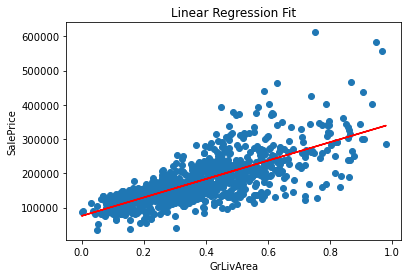

In [42]:
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], lr.params[0] + lr.params[1] * X_train_lm.iloc[:, 1], 'r')  # plotting the regression line
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Linear Regression Fit')
plt.show()

In [43]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          1.06e-154
Time:                        15:54:39   Log-Likelihood:                -11601.
No. Observations:                 950   AIC:                         2.321e+04
Df Residuals:                     948   BIC:                         2.322e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.579e+04   3487.991     21.729      0.0

In [44]:
# Assign all the feature variables to X
X_train_lm = X_train[['GrLivArea', 'FullBath_1','FullBath_2']]

In [45]:
# Build a linear model

X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         145239.655637
GrLivArea     216159.965225
FullBath_1    -66563.123475
FullBath_2    -36542.399327
dtype: float64

In [46]:
# Print the summary of the model

print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     393.4
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          8.02e-166
Time:                        15:54:39   Log-Likelihood:                -11568.
No. Observations:                 950   AIC:                         2.314e+04
Df Residuals:                     946   BIC:                         2.316e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.452e+05   1.45e+04     10.001      0.0

### Adding all the variables to the model

In [47]:
df_train.columns

Index(['GrLivArea', 'Bedroom_2', 'Bedroom_3', 'Bedroom_4', 'FullBath_1',
       'FullBath_2', 'FullBath_3'],
      dtype='object')

In [48]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         1.163968e+18
GrLivArea     2.719774e+05
Bedroom_2    -1.121719e+17
Bedroom_3    -1.121719e+17
Bedroom_4    -1.121719e+17
FullBath_1   -1.051796e+18
FullBath_2   -1.051796e+18
FullBath_3   -1.051796e+18
dtype: float64

In [49]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     279.9
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          1.51e-183
Time:                        15:54:39   Log-Likelihood:                -11521.
No. Observations:                 950   AIC:                         2.305e+04
Df Residuals:                     944   BIC:                         2.308e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.164e+18   5.16e+17      2.256      0.0

In [50]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Bedroom_2,inf
2,Bedroom_3,inf
3,Bedroom_4,inf
4,FullBath_1,inf
5,FullBath_2,inf
6,FullBath_3,inf
0,GrLivArea,2.14


In [52]:
X = X_train.drop('FullBath_3', 1,)

In [53]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [54]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     283.5
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          3.84e-185
Time:                        15:54:39   Log-Likelihood:                -11517.
No. Observations:                 950   AIC:                         2.305e+04
Df Residuals:                     944   BIC:                         2.308e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.553e+04   1.04e+04      9.165      0.0

In [55]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Bedroom_3,53.72
1,Bedroom_2,24.59
4,FullBath_1,19.84
5,FullBath_2,18.17
3,Bedroom_4,15.46
0,GrLivArea,2.15


In [56]:
X = X.drop('Bedroom_3', 1)

In [57]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [58]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     283.5
Date:                Sat, 15 Jun 2024   Prob (F-statistic):          3.84e-185
Time:                        15:54:39   Log-Likelihood:                -11517.
No. Observations:                 950   AIC:                         2.305e+04
Df Residuals:                     944   BIC:                         2.308e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.377e+05    1.4e+04      9.849      0.0

### Residual Analysis of the train data

In [59]:
y_train_price = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

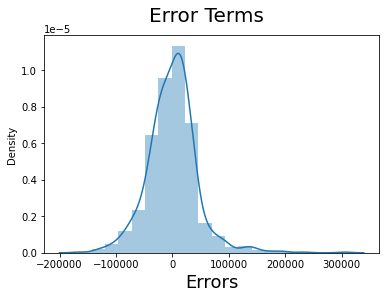

In [60]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [61]:
df_test

,GrLivArea,SalePrice,Bedroom_2,Bedroom_3,Bedroom_4,FullBath_1,FullBath_2,FullBath_3
1434,0.222650,160000,0,1,0,0,1,0
388,0.373504,191000,0,1,0,0,1,0
1405,0.444872,275000,1,0,0,0,1,0
951,0.153846,119900,0,1,0,1,0,0
791,0.195299,146800,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
480,0.532051,326000,0,1,0,0,1,0
174,0.447009,184000,0,1,0,0,1,0
1321,0.049145,72500,1,0,0,1,0,0
764,0.379915,270000,1,0,0,1,0,0


#### Dividing into X_test and y_test

In [62]:
y_test = df_test.pop('SalePrice')
X_test = df_test

In [63]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [64]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(["FullBath_3", "Bedroom_3"], axis = 1)

In [65]:
# Making predictions using the fourth model

y_pred_m4 = lr_3.predict(X_test_m4)

### Model Evaluation

Text(0, 0.5, 'y_pred')

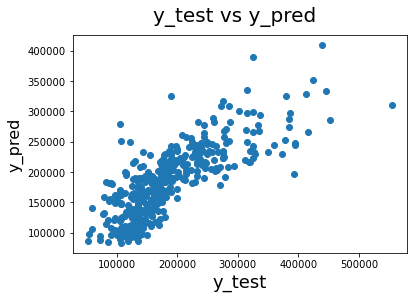

In [66]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

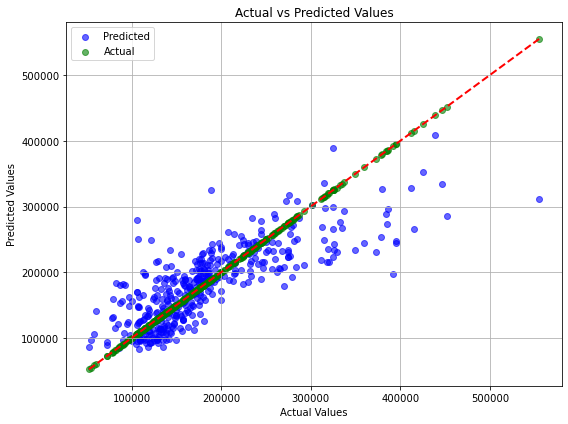

In [67]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_m4, color='blue', alpha=0.6, label='Predicted')  # Predicted values in blue
plt.scatter(y_test, y_test, color='green', alpha=0.6, label='Actual')  # Actual values in green
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [68]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [69]:
predictions = model.predict(Test_df)

In [72]:
# Create a new DataFrame or update the existing test_data with predictions
Test_df['Predicted_SalePrice'] = predictions

# Save the predictions to a new CSV file or use as needed
Test_df.to_csv('predicted_sale_prices.csv', index=False)